## Prerequisites

### Import libraries

In [1]:
from Tuning import Tunning
from Feature_selector import Feature_selector


# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
# from google.colab import output

from pandas import DatetimeIndex as dt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# from google.colab import files
import IPython
from IPython.display import HTML, display, clear_output 
# from google.colab import drive
import sys

# hyper-parameters optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as TP_rate                          
from sklearn.metrics import roc_auc_score as roc_auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score as recall
from sklearn.metrics import average_precision_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer,fbeta_score
from sklearn.model_selection import StratifiedKFold


# classifiers
from sklearn.ensemble import RandomForestClassifier
# BaggingClassifier, AdaBoostRegressor, RandomForestRegressor, GradientBoostingClassifier, StackingClassifier, VotingClassifier #
from sklearn.tree import DecisionTreeClassifier     #
from sklearn.svm import SVC                                    # both linear and radial classification
from sklearn.neighbors import KNeighborsClassifier             # k=3
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import catboost
from catboost import CatBoostClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from mlxtend.classifier import StackingClassifier

# statistics
# from scipy.stats import shapiro
# from scipy.stats import chi2_contingency
# from scipy.stats import mannwhitneyu

# imputations
# explicitly require this experimental feature
# from sklearn.experimental import enable_iterative_imputer  # noqa
# # now you can import normally from sklearn.impute
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.base import clone

# feature selection
# from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, SelectKBest, RFE, RFECV, SequentialFeatureSelector
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from scipy.stats import kendalltau, spearmanr
# from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold
# from mrmr import mrmr_classif
# from yellowbrick.features import RFECV as RFECV_visual
# import shap

# from tqdm.auto import tqdm

# # to conver string to dict
import ast

# Interpretability
#  # !pip install interpret
# from interpret.blackbox import LimeTabular
# from interpret import set_visualize_provider
# from interpret.provider import InlineProvider
# set_visualize_provider(InlineProvider())
# from interpret import show

# import lime
# import lime.lime_tabular
# from __future__ import print_function
import pickle

# ignore warnings when graphs are plotted
import warnings
warnings.filterwarnings('ignore')

In [2]:
# links to datasets

# combined
link_train_combined_a   = '../Preprocessed Data/Combined target/Imputed data/train_a.xlsx'
link_test_combined_a    = '../Preprocessed Data/Combined target/Imputed data/test_a.xlsx'
link_train_combined_b   = '../Preprocessed Data/Combined target/Imputed data/train_b.xlsx'
link_test_combined_b    = '../Preprocessed Data/Combined target/Imputed data/test_b.xlsx'
link_train_combined_c   = '../Preprocessed Data/Combined target/Imputed data/train_c.xlsx'
link_test_combined_c    = '../Preprocessed Data/Combined target/Imputed data/test_c.xlsx'
link_train_combined_d   = '../Preprocessed Data/Combined target/Imputed data/train_d.xlsx'
link_test_combined_d    = '../Preprocessed Data/Combined target/Imputed data/test_d.xlsx'
link_train_combined_abcd = '../Preprocessed Data/Combined target/Imputed data/train_abcd.xlsx'
link_test_combined_abcd  = '../Preprocessed Data/Combined target/Imputed data/test_abcd.xlsx'

## Preselected features and preprocessed data

In [3]:
clinical_features = list(map(tuple, pd.read_excel('../Raw data/Clinical features.xlsx', index_col=0, header=0).values))

biomarkers_a = list(map(tuple, pd.read_excel('../Raw data/biomarkers_a.xlsx', index_col=0, header=0).values.tolist()))
biomarkers_b = list(map(tuple, pd.read_excel('../Raw data/biomarkers_b.xlsx', index_col=0, header=0).values.tolist()))
biomarkers_c = list(map(tuple, pd.read_excel('../Raw data/biomarkers_c.xlsx', index_col=0, header=0).values.tolist()))
targets = list(map(tuple, pd.read_excel('../Raw data/targets_features.xlsx', index_col=0, header=0).values.tolist()))

continuous = list(map(tuple, pd.read_excel('../Raw data/continuous_features.xlsx', index_col=0, header=0).values.tolist()))
# all biomarkers were continuous except 'БСЖК' in data_b

categorical = list(map(tuple, pd.read_excel('../Raw data/categorical_features.xlsx', index_col=0, header=0).values.tolist()))
# include 'БСЖК' biomarkers from data_b

In [4]:
# importing preprocessed data
test_a = pd.read_excel('../Preprocessed data/Combined target/Imputed data/test_a.xlsx', index_col=0, header=[0])
train_a = pd.read_excel('../Preprocessed data/Combined target/Imputed data/train_a.xlsx', index_col=0, header=[0])
test_b = pd.read_excel('../Preprocessed data/Combined target/Imputed data/test_b.xlsx', index_col=0, header=[0])
train_b = pd.read_excel('../Preprocessed data/Combined target/Imputed data/train_b.xlsx', index_col=0, header=[0])
test_c = pd.read_excel('../Preprocessed data/Combined target/Imputed data/test_c.xlsx', index_col=0, header=[0])
train_c = pd.read_excel('../Preprocessed data/Combined target/Imputed data/train_c.xlsx', index_col=0, header=[0])
test_d = pd.read_excel('../Preprocessed data/Combined target/Imputed data/test_d.xlsx', index_col=0, header=[0])
train_d = pd.read_excel('../Preprocessed data/Combined target/Imputed data/train_d.xlsx', index_col=0, header=[0])
test_abcd = pd.read_excel('../Preprocessed data/Combined target/Imputed data/test_abcd.xlsx', index_col=0, header=[0])
train_abcd = pd.read_excel('../Preprocessed data/Combined target/Imputed data/train_abcd.xlsx', index_col=0, header=[0])

### Define $MCC$ metric

In [5]:
def func(y_true, y_pred):
    score = mcc(y_true, y_pred)
    return score

def mcc_scorer():
    return make_scorer(func)

## Tunning

### All clinical

In [ ]:
tuner = Tunning(
                targets = ['Combined target'], # cardiovascular death, revascularization, Combined target
                datasets = ['a', 'b', 'c'], # a, b, c, abc
                subsets = ['Biomarkers + Clinical', 'Clinical', 'Biomarkers'], # Biomarkers, Clinical, Biomarkers + Clinical
                models = [''],          # do not use this flag for specific model tuning
                selectors = [''],       # RF_feature_importance/, SFS/RFE/, SHAP/
                catboost_score = 'AUC:hints=skip_train~false', # 'F:beta=2' 
                score = {'roc_auc' : 'roc_auc', 'mcc' : mcc_scorer()}, # 'roc_auc' my_f2_scorer()
                drop_col = None,
                folder = 'all'
)

In [ ]:
tuner.logistic_regression = True
tuner.knn = True 
tuner.random_forest = True
tuner.svm = True
tuner.catboost = True
tuner.adaboost = True 

tuner.save = True

In [8]:
tuner.tune()
clear_output()

In [9]:
tuner.datasets = ['d', 'abcd']
tuner.subsets = ['Clinical']
tuner.tune()
clear_output()

#### Metrics on full datasets

In [18]:
datasets

,biomarkers A,biomarkers B,biomarkers C,Clinical ABCD,Clinical+biomarkers A,Clinical+biomarkers B,Clinical+biomarkers C,Clinical A,Clinical B,Clinical C
0,0.560,0.000,0.000,0.452,0.760,0.667,0.200,0.680,0.333,0.200
1,0.400,0.667,0.000,0.476,0.640,0.833,0.400,0.640,0.500,0.800
2,0.520,0.333,0.600,0.643,0.800,0.833,0.800,0.680,0.833,0.600
3,0.400,0.000,0.000,0.310,0.640,0.167,0.200,0.560,0.000,0.200
4,0.640,0.167,0.200,0.214,0.640,0.333,0.800,0.520,0.667,0.800
5,0.600,0.000,0.000,0.548,0.760,0.500,0.200,0.720,0.500,0.800


In [22]:
# what metric to evaluate
# MCC F1 ROC_AUC
metrics = ['ROC_AUC']

for metric in metrics:
    # list of paths
    paths = [
            '../Optimisation files/Combined target/Biomarkers A/all/',
            '../Optimisation files/Combined target/Biomarkers B/all/',
            '../Optimisation files/Combined target/Biomarkers C/all/',
            '../Optimisation files/Combined target/Clinical ABCD/all/',
            '../Optimisation files/Combined target/Biomarkers + Clinical A/all/',
            '../Optimisation files/Combined target/Biomarkers + Clinical B/all/',
            '../Optimisation files/Combined target/Biomarkers + Clinical C/all/',
            '../Optimisation files/Combined target/Clinical A/all/',
            '../Optimisation files/Combined target/Clinical B/all/',
            '../Optimisation files/Combined target/Clinical C/all/',
            ]

    # create datframe for scores
    datasets = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_mean = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_std = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])

    # get dataframe with with scores of models from different datasets
    for i in range(len(paths)):
        table = pd.read_excel(f'{paths[i]}metrics_table.xlsx', header=[0,1], index_col=[0]) #ensemble: advanced_models_metrics, standart: metrics_table
        datasets[datasets.columns[i]] = list(table.loc[:, ('Scores on the test set', metric)].values.round(3)) 
        if metric == 'MCC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'std')].values.round(3)) 
        if metric == 'ROC_AUC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'std')].values.round(3)) 

    # list of models
    # standart models
    models=['RandomForest', 'SVM', 'Logistic Regression', 'KNN', 'adaBoost', 'CatBoost']
    # ensemble models
    # models=['Hard voting', 'Soft voting', 'Stacking', 'Bagging', 'adaBoosting']

    # create the graph
    fig = go.Figure(data=[go.Bar(name=column, x=models, y=datasets[column]) for column in datasets.columns])
        
    # add error whiskers from gridsearchCV
    if True:
        fig.add_traces([go.Box(name=column, x=models, 
                              y=datasets_mean[column], 
                              #  xaxis="x1",  
                              
                              marker=dict(color="black"), 
                              showlegend = False) for column in datasets.columns])
        fig.update_traces(
        selector=dict(type="box"), # update only boxes
        boxpoints="all", # show points
        pointpos=0, # centered
        jitter=0, # no jitter
        line_color="rgba(255,255,255,0)", # hide box lines
        fillcolor="rgba(255,255,255,0)", # hide box fill
        
        )
        fig.update_layout(boxmode="group",)

        fig.add_traces([go.Bar(name=column, x=models, 
                              y=datasets_mean[column], 
                              xaxis="x2",  
                              error_y=dict(type='data',  
                                            array=datasets_std[column], 
                                            color="rgba(0,0,0,1)",
                                            thickness=1), 
                              marker=dict(opacity=0,
                                          #  color="rgba(255,255,255,0)"
                                          ), 
                              showlegend = False) for column in datasets.columns])  
        

    fig.update_xaxes(title='Models')
    # Change the bar mode
    fig.update_layout(barmode='group', 
                      xaxis2={"overlaying": "x", "range": [-0.515, 5.515], "showticklabels": False},
                      bargap=0.30,
                      bargroupgap=0.3,
                      legend=dict(orientation="v", title='Datasets'), 
                      title=dict(text=f'{metric} score', x=0.5,),
                      margin=dict(l=60, r=20, t=60, b=40),)

    fig.update_yaxes(title='Score', range=[-1., 1.0])


    # add dotted line for ROC AUC = 0.5
    if metric == 'ROC_AUC':
        fig.update_yaxes(title='Score', range=[0., 1.0])
        fig.add_shape(type='line',
                        x0=-0.5,
                        y0=0.5,
                        x1=5.5,
                        y1=0.5,
                        line=dict(color='firebrick',  width=2, dash='dot'),
                        xref='x',
                        yref='y')   
    # figure size
    fig.update_layout(
        autosize=False,
        width=1300,
        height=450,) 
    fig.show()
    # fig.write_image(f"../Optimisation files/Combined target/Metrics/{metric}_all.pdf", engine="kaleido")

### No grace

In [17]:
tuner = Tunning(
                targets = ['Combined target'], # cardiovascular death, revascularization, Combined target
                datasets = ['a', 'b', 'c'], # a, b, c, abc
                subsets = ['Biomarkers + Clinical', 'Clinical'], # Biomarkers, Clinical, Biomarkers + Clinical
                models = [''],          # do not use this flag for specific model tuning
                selectors = [''],       # RF_feature_importance/, SFS/RFE/, SHAP/
                catboost_score = 'AUC:hints=skip_train~false', # 'F:beta=2' 
                score = {'roc_auc' : 'roc_auc', 'mcc' : mcc_scorer()}, # 'roc_auc' my_f2_scorer()
                drop_col = "('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
                folder = 'no_grace'
)

In [18]:
tuner.logistic_regression = True
tuner.knn = True 
tuner.random_forest = True
tuner.svm = True
tuner.catboost = True
tuner.adaboost = True 

tuner.save = True

In [19]:
tuner.tune()
clear_output()

In [20]:
tuner.datasets = ['d', 'abcd']
tuner.subsets = ['Clinical']
tuner.tune()
clear_output()

#### Metrics on full datasets

In [21]:
# what metric to evaluate
# MCC F1 ROC_AUC
metrics = ['MCC', 'ROC_AUC']

for metric in metrics:
    # list of paths
    paths = [
            '../Optimisation files/Combined target/Biomarkers A/all/',
            '../Optimisation files/Combined target/Biomarkers B/all/',
            '../Optimisation files/Combined target/Biomarkers C/all/',
            '../Optimisation files/Combined target/Clinical ABCD/no_grace/',
            '../Optimisation files/Combined target/Biomarkers + Clinical A/no_grace/',
            '../Optimisation files/Combined target/Biomarkers + Clinical B/no_grace/',
            '../Optimisation files/Combined target/Biomarkers + Clinical C/no_grace/',
            '../Optimisation files/Combined target/Clinical A/no_grace/',
            '../Optimisation files/Combined target/Clinical B/no_grace/',
            '../Optimisation files/Combined target/Clinical C/no_grace/',
            ]

    # create datframe for scores
    datasets = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_mean = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_std = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])

    # get dataframe with with scores of models from different datasets
    for i in range(len(paths)):
        table = pd.read_excel(f'{paths[i]}metrics_table.xlsx', header=[0,1], index_col=[0]) #ensemble: advanced_models_metrics, standart: metrics_table
        datasets[datasets.columns[i]] = list(table.loc[:, ('Scores on the test set', metric)].values.round(3)) 
        if metric == 'MCC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'std')].values.round(3)) 
        if metric == 'ROC_AUC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'std')].values.round(3)) 

    # list of models
    # standart models
    models=['RandomForest', 'SVM', 'Logistic Regression', 'KNN', 'adaBoost', 'CatBoost']
    # ensemble models
    # models=['Hard voting', 'Soft voting', 'Stacking', 'Bagging', 'adaBoosting']

    # create the graph
    fig = go.Figure(data=[go.Bar(name=column, x=models, y=datasets[column]) for column in datasets.columns])
        
    # add error whiskers from gridsearchCV
    if True:
        fig.add_traces([go.Box(name=column, x=models, 
                              y=datasets_mean[column], 
                              #  xaxis="x1",  
                              
                              marker=dict(color="black"), 
                              showlegend = False) for column in datasets.columns])
        fig.update_traces(
        selector=dict(type="box"), # update only boxes
        boxpoints="all", # show points
        pointpos=0, # centered
        jitter=0, # no jitter
        line_color="rgba(255,255,255,0)", # hide box lines
        fillcolor="rgba(255,255,255,0)", # hide box fill
        
        )
        fig.update_layout(boxmode="group",)

        fig.add_traces([go.Bar(name=column, x=models, 
                              y=datasets_mean[column], 
                              xaxis="x2",  
                              error_y=dict(type='data',  
                                            array=datasets_std[column], 
                                            color="rgba(0,0,0,1)",
                                            thickness=1), 
                              marker=dict(opacity=0,
                                          #  color="rgba(255,255,255,0)"
                                          ), 
                              showlegend = False) for column in datasets.columns])  
        

    fig.update_xaxes(title='Models')
    # Change the bar mode
    fig.update_layout(barmode='group', 
                      xaxis2={"overlaying": "x", "range": [-0.515, 5.515], "showticklabels": False},
                      bargap=0.30,
                      bargroupgap=0.3,
                      legend=dict(orientation="v", title='Datasets'), 
                      title=dict(text=f'{metric} score', x=0.5,),
                      margin=dict(l=60, r=20, t=60, b=40),)

    fig.update_yaxes(title='Score', range=[-1., 1.0])


    # add dotted line for ROC AUC = 0.5
    if metric == 'ROC_AUC':
        fig.update_yaxes(title='Score', range=[0., 1.0])
        fig.add_shape(type='line',
                        x0=-0.5,
                        y0=0.5,
                        x1=5.5,
                        y1=0.5,
                        line=dict(color='firebrick',  width=2, dash='dot'),
                        xref='x',
                        yref='y')   
    # figure size
    fig.update_layout(
        autosize=False,
        width=1300,
        height=450,) 
    fig.show()
    fig.write_image(f"../Optimisation files/Combined target/Metrics/{metric}_no_grace.pdf", engine="kaleido")

### Only grace

In [22]:
tuner = Tunning(
                targets = ['Combined target'], # cardiovascular death, revascularization, Combined target
                datasets = [ 'a', 'b', 'c'], # a, b, c, abc
                subsets = ['Clinical', 'Biomarkers + Clinical'], # Biomarkers, Clinical, Biomarkers + Clinical
                models = [''],          # do not use this flag for specific model tuning
                selectors = [''],       # RF_feature_importance/, SFS/RFE/, SHAP/
                catboost_score = 'MCC', # 'F:beta=2' 
                score = {'roc_auc' : 'roc_auc', 'mcc' : mcc_scorer()}, # 'roc_auc' my_f2_scorer()
                drop_col = list(set(map(str, clinical_features)) - set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"])),
                folder = 'grace'
)

In [23]:
tuner.logistic_regression = True 
tuner.knn = True
tuner.random_forest = True
tuner.svm = True
tuner.catboost = True
tuner.adaboost = True

tuner.save = True

In [24]:
tuner.tune()
clear_output()

In [25]:
tuner.datasets = ['d', 'abcd']
tuner.subsets = ['Clinical']
tuner.tune()
clear_output()

#### Metrics on full datasets

In [26]:
# what metric to evaluate
# MCC F1 ROC_AUC
metrics = ['MCC', 'ROC_AUC']

for metric in metrics:
    # list of paths
    paths = [
            '../Optimisation files/Combined target/Biomarkers A/all/',
            '../Optimisation files/Combined target/Biomarkers B/all/',
            '../Optimisation files/Combined target/Biomarkers C/all/',
            '../Optimisation files/Combined target/Clinical ABCD/grace/',
            '../Optimisation files/Combined target/Biomarkers + Clinical A/grace/',
            '../Optimisation files/Combined target/Biomarkers + Clinical B/grace/',
            '../Optimisation files/Combined target/Biomarkers + Clinical C/grace/',
            '../Optimisation files/Combined target/Clinical A/grace/',
            '../Optimisation files/Combined target/Clinical B/grace/',
            '../Optimisation files/Combined target/Clinical C/grace/', 
            ]

    # create datframe for scores
    datasets = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_mean = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_std = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])

    # get dataframe with with scores of models from different datasets
    for i in range(len(paths)):
        table = pd.read_excel(f'{paths[i]}metrics_table.xlsx', header=[0,1], index_col=[0]) #ensemble: advanced_models_metrics, standart: metrics_table
        datasets[datasets.columns[i]] = list(table.loc[:, ('Scores on the test set', metric)].values.round(3)) 
        if metric == 'MCC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'std')].values.round(3)) 
        if metric == 'ROC_AUC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'std')].values.round(3)) 

    # list of models
    # standart models
    models=['RandomForest', 'SVM', 'Logistic Regression', 'KNN', 'adaBoost', 'CatBoost']
    # ensemble models
    # models=['Hard voting', 'Soft voting', 'Stacking', 'Bagging', 'adaBoosting']

    # create the graph
    fig = go.Figure(data=[go.Bar(name=column, x=models, y=datasets[column]) for column in datasets.columns])
        
    # add error whiskers from gridsearchCV
    if True:
        fig.add_traces([go.Box(name=column, x=models, 
                              y=datasets_mean[column], 
                              #  xaxis="x1",  
                              
                              marker=dict(color="black"), 
                              showlegend = False) for column in datasets.columns])
        fig.update_traces(
        selector=dict(type="box"), # update only boxes
        boxpoints="all", # show points
        pointpos=0, # centered
        jitter=0, # no jitter
        line_color="rgba(255,255,255,0)", # hide box lines
        fillcolor="rgba(255,255,255,0)", # hide box fill
        
        )
        fig.update_layout(boxmode="group",)

        fig.add_traces([go.Bar(name=column, x=models, 
                              y=datasets_mean[column], 
                              xaxis="x2",  
                              error_y=dict(type='data',  
                                            array=datasets_std[column], 
                                            color="rgba(0,0,0,1)",
                                            thickness=1), 
                              marker=dict(opacity=0,
                                          #  color="rgba(255,255,255,0)"
                                          ), 
                              showlegend = False) for column in datasets.columns])  
        

    fig.update_xaxes(title='Models')
    # Change the bar mode
    fig.update_layout(barmode='group', 
                      xaxis2={"overlaying": "x", "range": [-0.515, 5.515], "showticklabels": False},
                      bargap=0.30,
                      bargroupgap=0.3,
                      legend=dict(orientation="v", title='Datasets'), 
                      title=dict(text=f'{metric} score with grace only', x=0.5,),
                      margin=dict(l=60, r=20, t=60, b=40),)

    fig.update_yaxes(title='Score', range=[-1., 1.0])


    # add dotted line for ROC AUC = 0.5
    if metric == 'ROC_AUC':
        fig.update_yaxes(title='Score', range=[0., 1.0])
        fig.add_shape(type='line',
                        x0=-0.5,
                        y0=0.5,
                        x1=5.5,
                        y1=0.5,
                        line=dict(color='firebrick',  width=2, dash='dot'),
                        xref='x',
                        yref='y')   
    # figure size
    fig.update_layout(
        autosize=False,
        width=1300,
        height=450,) 
    fig.show()
    fig.write_image(f"../Optimisation files/Combined target/Metrics/{metric}_grace.pdf", engine="kaleido") 

### Top clinical

In [73]:
preselected = \
["('ИСХОДНАЯ ЭХОКГ', 'ФВ ЛЖ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'ТГц, ммоль/л')",
 "('ИСХОДНАЯ ЭХОКГ', 'иКСО ЛЖ')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'ИМТ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Гемоглобин, г/л')",
 "('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'Возраст')",
 "('СОПУТСТВУЮЩИЕ ЗАБОЛЕВАНИЯ И СОСТОЯНИЯ', 'Индекс коморбидности')"]


In [54]:
tuner = Tunning(
                targets = ['Combined target'], # cardiovascular death, revascularization, Combined target
                datasets = [ 'a', 'b', 'c'], # a, b, c, abc
                subsets = ['Clinical', 'Biomarkers + Clinical'], # Biomarkers, Clinical, Biomarkers + Clinical
                models = [''],          # do not use this flag for specific model tuning
                selectors = [''],       # RF_feature_importance/, SFS/RFE/, SHAP/
                catboost_score = 'MCC', # 'F:beta=2' 
                score = {'roc_auc' : 'roc_auc', 'mcc' : mcc_scorer()}, # 'roc_auc' my_f2_scorer()
                drop_col = list(set(map(str, clinical_features)) - set(preselected)),
                folder = 'top'
)

In [55]:
tuner.logistic_regression = True 
tuner.knn = True
tuner.random_forest = True
tuner.svm = True
tuner.catboost = True
tuner.adaboost = True

tuner.save = True

In [56]:
tuner.tune()
clear_output()

In [57]:
tuner.datasets = ['d', 'abcd']
tuner.subsets = ['Clinical']
tuner.tune()
clear_output()

#### Metrics on full datasets

In [44]:
datasets_std.index = ['RandomForest', 'SVM', 'Logistic Regression', 'KNN', 'adaBoost', 'CatBoost']
datasets_mean.index = ['RandomForest', 'SVM', 'Logistic Regression', 'KNN', 'adaBoost', 'CatBoost']
# datasets[['Clinical+biomarkers A', 'Clinical A']]

In [71]:
letter = 'C'
df = pd.concat([datasets_mean[[f'Clinical+biomarkers {letter}', f'Clinical {letter}']], datasets_std[[f'Clinical+biomarkers {letter}', f'Clinical {letter}']]], axis=1)

In [72]:

df.loc[df.index[df[f'Clinical+biomarkers {letter}'].values[:,0].argmax()]]

Clinical+biomarkers C    0.975
Clinical C               0.922
Clinical+biomarkers C    0.023
Clinical C               0.108
Name: SVM, dtype: float64

In [31]:
# create the graph
fig = go.Figure()

# fig = go.Scatter()
# fig.update_traces(marker_size=10)
# fig.update_layout(scattermode="group", scattergap=0.75)
# fig.show()
fig.update_yaxes(title='Score', range=[.5, 1.0])
fig.update_xaxes(title='Models')
# Change the bar mode
fig.update_layout(barmode='group', 
                    xaxis2={"overlaying": "x", "range": [-0.515, 5.515], "showticklabels": False},
                    bargap=0.30,
                    bargroupgap=0.3,
                    legend=dict(orientation="v", title='Datasets'), 
                    title=dict(text=f'{metric} score with grace only', x=0.5,),
                    margin=dict(l=60, r=20, t=60, b=40),)
# figure size
fig.update_layout(
    autosize=False,
    width=1300,
    height=450,) 
fig.show()
# fig.write_image(f"../Optimisation files/Combined target/Metrics/{metric}_top.pdf", engine="kaleido") 

In [42]:
# what metric to evaluate
# MCC F1 ROC_AUC
metrics = ['MCC', 'ROC_AUC']

for metric in metrics:
    # list of paths
    paths = [
            '../Optimisation files/Combined target/Biomarkers A/all/',
            '../Optimisation files/Combined target/Biomarkers B/all/',
            '../Optimisation files/Combined target/Biomarkers C/all/',
            '../Optimisation files/Combined target/Clinical ABCD/top/',
            '../Optimisation files/Combined target/Biomarkers + Clinical A/top/',
            '../Optimisation files/Combined target/Biomarkers + Clinical B/top/',
            '../Optimisation files/Combined target/Biomarkers + Clinical C/top/',
            '../Optimisation files/Combined target/Clinical A/top/',
            '../Optimisation files/Combined target/Clinical B/top/',
            '../Optimisation files/Combined target/Clinical C/top/', 
            ]

    # create datframe for scores
    datasets = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_mean = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])
    datasets_std = pd.DataFrame(columns=['biomarkers A','biomarkers B','biomarkers C','Clinical ABCD','Clinical+biomarkers A','Clinical+biomarkers B','Clinical+biomarkers C', 'Clinical A','Clinical B','Clinical C'])

    # get dataframe with with scores of models from different datasets
    for i in range(len(paths)):
        table = pd.read_excel(f'{paths[i]}metrics_table.xlsx', header=[0,1], index_col=[0]) #ensemble: advanced_models_metrics, standart: metrics_table
        datasets[datasets.columns[i]] = list(table.loc[:, ('Scores on the test set', metric)].values.round(3)) 
        if metric == 'MCC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('MCC, train set, cv=5', 'std')].values.round(3)) 
        if metric == 'ROC_AUC':
            datasets_mean[datasets_mean.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'mean')].values.round(3)) 
            datasets_std[datasets_std.columns[i]] = list(table.loc[:, ('ROC_AUC, train set, cv=5', 'std')].values.round(3)) 

    # list of models
    # standart models
    models=['RandomForest', 'SVM', 'Logistic Regression', 'KNN', 'adaBoost', 'CatBoost']
    # ensemble models
    # models=['Hard voting', 'Soft voting', 'Stacking', 'Bagging', 'adaBoosting']

    # create the graph
    fig = go.Figure(data=[go.Bar(name=column, x=models, y=datasets[column]) for column in datasets.columns])
        
    # add error whiskers from gridsearchCV
    if True:
        fig.add_traces([go.Box(name=column, x=models, 
                              y=datasets_mean[column], 
                              #  xaxis="x1",  
                              
                              marker=dict(color="black"), 
                              showlegend = False) for column in datasets.columns])
        fig.update_traces(
        selector=dict(type="box"), # update only boxes
        boxpoints="all", # show points
        pointpos=0, # centered
        jitter=0, # no jitter
        line_color="rgba(255,255,255,0)", # hide box lines
        fillcolor="rgba(255,255,255,0)", # hide box fill
        
        )
        fig.update_layout(boxmode="group",)

        fig.add_traces([go.Bar(name=column, x=models, 
                              y=datasets_mean[column], 
                              xaxis="x2",  
                              error_y=dict(type='data',  
                                            array=datasets_std[column], 
                                            color="rgba(0,0,0,1)",
                                            thickness=1), 
                              marker=dict(opacity=0,
                                          #  color="rgba(255,255,255,0)"
                                          ), 
                              showlegend = False) for column in datasets.columns])  
        

    fig.update_xaxes(title='Models')
    # Change the bar mode
    fig.update_layout(barmode='group', 
                      xaxis2={"overlaying": "x", "range": [-0.515, 5.515], "showticklabels": False},
                      bargap=0.30,
                      bargroupgap=0.3,
                      legend=dict(orientation="v", title='Datasets'), 
                      title=dict(text=f'{metric} score with grace only', x=0.5,),
                      margin=dict(l=60, r=20, t=60, b=40),)

    fig.update_yaxes(title='Score', range=[-1., 1.0])


    # add dotted line for ROC AUC = 0.5
    if metric == 'ROC_AUC':
        fig.update_yaxes(title='Score', range=[0., 1.0])
        fig.add_shape(type='line',
                        x0=-0.5,
                        y0=0.5,
                        x1=5.5,
                        y1=0.5,
                        line=dict(color='firebrick',  width=2, dash='dot'),
                        xref='x',
                        yref='y')   
    # figure size
    fig.update_layout(
        autosize=False,
        width=1300,
        height=450,) 
    fig.show()
    # fig.write_image(f"../Optimisation files/Combined target/Metrics/{metric}_top.pdf", engine="kaleido") 

# Feature selection

## Selection of top clinical features

### SFS, RFFI and SHAP for all features

In [6]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c', 'd', 'abcd', ],                     # a, b, c, abc
    subsets = ['Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest', 'LogisticRegression'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SFS'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'all',            # folder name to save results
    drop_col=None,
    # list(set(map(str, clinical_features)) - set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"])), 
)

fs.save = True
fs.get_importances(metric='roc_auc', fixed_N=None, N=len(clinical_features))
# fs.get_importances(metric='mcc', fixed_N=None, N=len(clinical_features)-1)
clear_output()

In [7]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c', 'd', 'abcd', ],                     # a, b, c, abc
    subsets = ['Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['RFFI', 'SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'all',            # folder name to save results
    drop_col=None,
    # list(set(map(str, clinical_features)) - set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"])), 
)

fs.save = True
fs.get_importances()

<Figure size 1404x486 with 0 Axes>

In [8]:
fs.models = ['LogisticRegression']
fs.selectors=['SHAP']
fs.get_importances()


<Figure size 1404x486 with 0 Axes>

### SFS, RFFI and SHAP for no_grace

In [9]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c', 'd', 'abcd', ],                     # a, b, c, abc
    subsets = ['Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest', 'LogisticRegression'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SFS'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'no_grace',            # folder name to save results
    drop_col="('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
    # list(set(map(str, clinical_features)) - set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"])), 
)

fs.save = True
fs.get_importances(metric='roc_auc', fixed_N=None, N=len(clinical_features)-1)
# fs.get_importances(metric='mcc', fixed_N=None, N=len(clinical_features)-1)
clear_output()

In [10]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c', 'd', 'abcd', ],                     # a, b, c, abc
    subsets = ['Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['RFFI', 'SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'no_grace',            # folder name to save results
    drop_col="('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
    # list(set(map(str, clinical_features)) - set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"])), 
)

fs.save = True
fs.get_importances()

<Figure size 1404x486 with 0 Axes>

In [11]:
fs.models = ['LogisticRegression']
fs.selectors=['SHAP']
fs.get_importances()


<Figure size 1404x486 with 0 Axes>

### SFS with preselected top features

In [18]:
preselected = list(set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/no_grace/SHAP/randomforest_shap_values.xlsx',
              index_col=0,
              header=0).sort_values('values', ascending=False)[:10]['features'].values).intersection(\
    set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/no_grace/SHAP/LogisticRegression_shap_values.xlsx',
              index_col=0,
              header=0).sort_values('values', ascending=False)[:10]['features'].values)).intersection(\
    set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/no_grace/RFFI/values.xlsx',
              index_col=0,
              header=0).sort_values('values', ascending=False)[:10]['features'].values)))

preselected

["('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Гемоглобин, г/л')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'Возраст')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'ТГц, ммоль/л')",
 "('ИСХОДНАЯ ЭХОКГ', 'иКСО ЛЖ')"]

In [19]:
for i in list(map(lambda x: eval(x)[1], preselected)):
    print(i)

Гемоглобин, г/л
Возраст
ТГц, ммоль/л
иКСО ЛЖ


In [20]:
sfs_preselected = list(set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/all/SFS/randomforest_roc_auc.xlsx',
              index_col=0,
              header=0).iloc[4,:10].values).intersection(\
    set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/all/SFS/LogisticRegression_roc_auc.xlsx',
              index_col=0,
              header=0).iloc[4,:10].values

              )))

sfs_preselected

features = []
for i in sfs_preselected:
    for j in map(str, clinical_features):
        if i in j:
            features.append(j)
features

["('ТРОПОНИНЫ по стандарту ОКД', 'TnT-ПО, нг/л')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Глюкоза, ммоль/л')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Креатинин, мкмоль/л')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'СКФ EPI')"]

In [18]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['abcd', ],                     # a, b, c, abc
    subsets = ['Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ["randomforest",],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SFS'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'top',            # folder name to save results
    drop_col=list(set(map(str, clinical_features)) - set(preselected)),
)

fs.save = False
fs.get_importances(metric='roc_auc', fixed_N=None, N=len(preselected))
# fs.get_importances(metric='mcc', fixed_N=None, N=len(preselected))

##  Selection of Biomarkers

### All clinical

In [68]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['c', ],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SFS'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'all',            # folder name to save results
    drop_col=None,
)
fs.save = True

# selection of biomarkers with clinical features as base
biomarkers = {'a':biomarkers_a, 'b':biomarkers_b, 'c':biomarkers_c}
for dataset in [ 'b', 'c', 'a']:
    fs.datasets = dataset, 
    for metric in ['roc_auc']:
        fs.get_importances(
                            metric=metric,
                            fixed_N=len(clinical_features),
                            N=len(clinical_features)+len(biomarkers[dataset])
        )

# # selection of biomarkers
# fs.subsets=['Biomarkers']
# for dataset in ['b', 'c', 'a']:
#     fs.datasets = dataset, 
#     for metric in ['roc_auc']:
#         fs.get_importances(
#                             metric=metric,
#                             fixed_N=None,
#                             N=len(biomarkers[dataset])
#         )

In [84]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c'],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical', 'Biomarkers'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'all',
    drop_col=None,
)
fs.save=True
fs.get_importances()
fs.selectors = ['RFFI']
fs.get_importances()

<Figure size 1404x486 with 0 Axes>

In [85]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c'],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical', 'Biomarkers'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['LogisticRegression'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'all',
    drop_col=None,
)
fs.save=True
# fs.selectors = ['RFFI']
# fs.get_importances()
fs.get_importances()

<Figure size 1404x486 with 0 Axes>

### w/o grace

In [73]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['c', ],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SFS'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'no_grace',            # folder name to save results
    drop_col="('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
)
fs.save = True

# selection of biomarkers with clinical features as base
biomarkers = {'a':biomarkers_a, 'b':biomarkers_b, 'c':biomarkers_c}
for dataset in [ 'b', 'c', 'a']:
    fs.datasets = dataset, 
    for metric in ['roc_auc']:
        fs.get_importances(
                            metric=metric,
                            fixed_N=len(clinical_features)-1,
                            N=len(clinical_features)-1+len(biomarkers[dataset])
        )


In [86]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c'],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical', 'Biomarkers'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'no_grace',
    drop_col="('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
)
fs.save=True
fs.get_importances()
fs.selectors = ['RFFI']
fs.get_importances()

<Figure size 1404x486 with 0 Axes>

In [87]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', 'b', 'c'],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical', 'Biomarkers'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['LogisticRegression'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'no_grace',
    drop_col="('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
)
fs.save=True
# fs.selectors = ['RFFI']
# fs.get_importances()
fs.get_importances()

<Figure size 1404x486 with 0 Axes>

### Top features

In [75]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a','c'],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['svm'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'top',
    drop_col=list(set(map(str, clinical_features)) - set(preselected)),
)
fs.save=True
fs.get_importances()
# fs.selectors = ['RFFI']
# fs.get_importances()

Permutation explainer: 191it [03:34,  1.17s/it]                         


<Figure size 1404x486 with 0 Axes>

In [76]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['b'],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'top',
    drop_col=list(set(map(str, clinical_features)) - set(preselected)),
)
fs.save=True
fs.get_importances()

<Figure size 1404x486 with 0 Axes>

## Comparison of use of GRACE

In [91]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['abcd', ],                     # a, b, c, abc
    subsets = ['Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['randomforest'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = [''],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'all',            # folder name to save results
    drop_col=None,
)


In [116]:
fig = go.Figure()

In [121]:
X_train, X_test, y_train, y_test = fs.get_train_test(link_train=link_train_combined_abcd, 
                                                     link_test=link_test_combined_abcd, 
                                                     dataset='abcd', 
                                                     subset='Clinical', 
                                                     drop_col=None
                                                    #  list(set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"]))
                                                     )

model = fs.get_model_instance(model='randomforest', target='Combined target', dataset='abcd', 
                                                     subset='Clinical', X_train=X_train, y_train=y_train)
predicted = model.predict_proba(X_test)

data = [y_test.values,  predicted[:,1]]
fpr, tpr, _ = roc_curve(*data)
auc = roc_auc(*data)
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=f'with Grace, AUC={str(auc.round(3))}'))

data = [y_train.values,  X_train['(\'ХАРАКТЕРИСТИКА ОИМ\', \'Риск GRACE, баллы\')'].values]
fpr, tpr, _ = roc_curve(*data)
auc = roc_auc(*data)
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=f'Grace, AUC={str(auc.round(3))}'))


X_train, X_test, y_train, y_test = fs.get_train_test(link_train=link_train_combined_abcd, 
                                                     link_test=link_test_combined_abcd, 
                                                     dataset='abcd', 
                                                     subset='Clinical', 
                                                     drop_col=list(set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"]))
                                                     )

model = fs.get_model_instance(model='randomforest', target='Combined target', dataset='abcd', 
                                                     subset='Clinical', X_train=X_train, y_train=y_train)
predicted = model.predict_proba(X_test)

data = [y_test.values,  predicted[:,1]]
fpr, tpr, _ = roc_curve(*data)
auc = roc_auc(*data)
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=f'w/o Grace, AUC={str(auc.round(3))}'))
print()

In [120]:


fig.update_layout(
                    legend=dict(orientation="v", 
                                title='Features', 
                                yanchor="bottom", 
                                y=0.01,
                                xanchor="right",
                                x=0.99), 
                    title=dict(text=f'ROC AUC curves', x=0.5,),
                    margin=dict(l=60, r=20, t=60, b=40), showlegend=True)


fig.update_xaxes(title='False Positive Rate', range=[0., 1.0])
fig.update_yaxes(title='True Positive Rate', range=[0., 1.0])
 
# figure size
fig.update_layout(
    autosize=False,
    width=1000,
    height=450,) 
fig.show()
# fig.write_image(f"../article/Graphics/grace_roc_auc_curves.pdf", engine="kaleido")

# Interpretation

In [7]:
import shap

In [8]:
preselected = \
[
"('ИСХОДНАЯ ЭХОКГ', 'ФВ ЛЖ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'ТГц, ммоль/л')",
 "('ИСХОДНАЯ ЭХОКГ', 'иКСО ЛЖ')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'ИМТ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Гемоглобин, г/л')",
 "('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'Возраст')",
#  "('ИСХОДНАЯ ЭХОКГ', 'иКДО ЛЖ')",
 "('СОПУТСТВУЮЩИЕ ЗАБОЛЕВАНИЯ И СОСТОЯНИЯ', 'Индекс коморбидности')",
#  "('ИСХОДНАЯ ЭХОКГ', 'иММ ЛЖ')"
 ]

In [39]:
fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a','c'],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ['svm'],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SHAP'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'top',
    drop_col=list(set(map(str, clinical_features)) - set(preselected)),
)

preselected = \
[
"('ИСХОДНАЯ ЭХОКГ', 'ФВ ЛЖ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'ТГц, ммоль/л')",
 "('ИСХОДНАЯ ЭХОКГ', 'иКСО ЛЖ')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'ИМТ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Гемоглобин, г/л')",
 "('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'Возраст')",
#  "('ИСХОДНАЯ ЭХОКГ', 'иКДО ЛЖ')",
 "('СОПУТСТВУЮЩИЕ ЗАБОЛЕВАНИЯ И СОСТОЯНИЯ', 'Индекс коморбидности')",
#  "('ИСХОДНАЯ ЭХОКГ', 'иММ ЛЖ')"
 ]

X_train, X_test, y_train, y_test = fs.get_train_test(link_train=link_train_combined_b, 
                                                     link_test=link_test_combined_b, 
                                                     dataset='b', 
                                                     subset='Biomarkers + Clinical', 
                                                     drop_col=list(set(map(str, clinical_features)) - set(preselected))
                                                    #  list(set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"]))
                                                     )

model = fs.get_model_instance(model='randomforest', target='Combined target', dataset='b', 
                                                     subset='Biomarkers + Clinical', X_train=X_train, y_train=y_train)
predicted = model.predict_proba(X_test)

### A

In [40]:
X_train.shape

(67, 14)

In [41]:
pd.concat([X_train, X_test]).shape

(90, 14)

In [42]:
# , pd.concat([X_train, X_test])
explainer = shap.TreeExplainer(model)
shap_values = explainer(pd.concat([X_train, X_test]))

exp = shap.Explanation(shap_values.values[:,:,1], 
                shap_values.base_values[:,1], 
                # data=X_test.values, # shows values of that patient
                feature_names=X_test.columns)

In [43]:
y_test[:10]

,"('target', 'combined')"
0,0
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


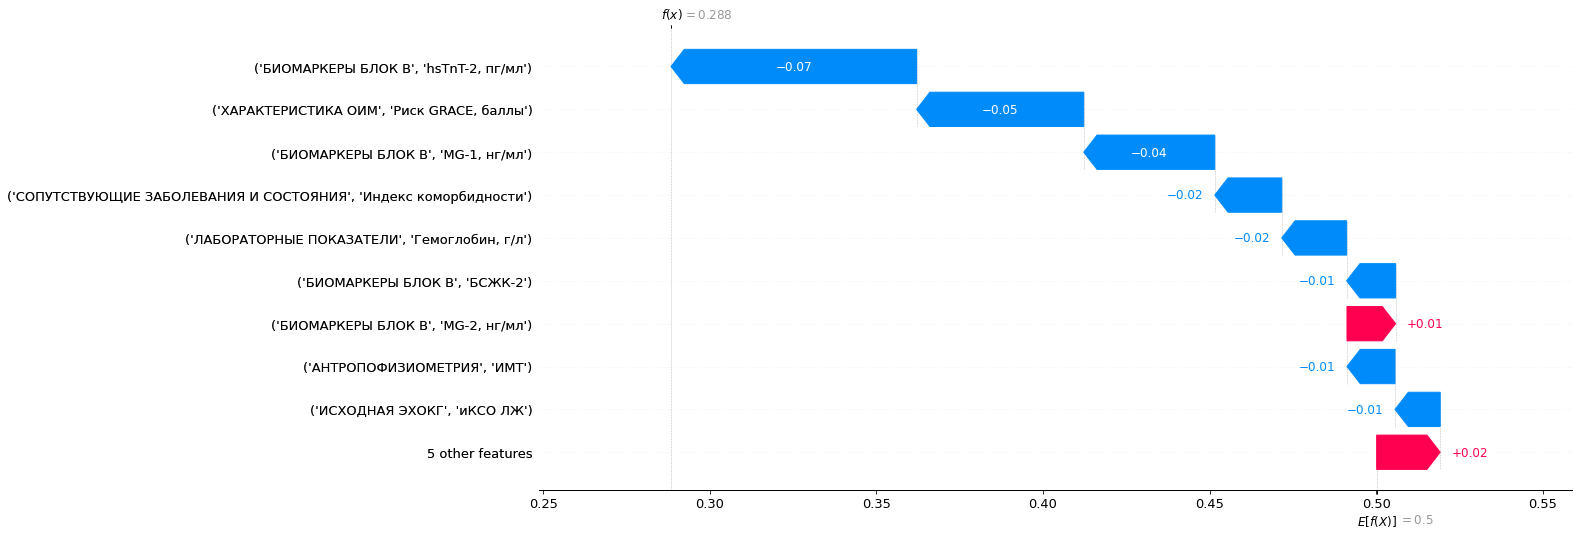

In [45]:
fig = shap.plots.waterfall(exp[-1], show=False)
fig.set_size_inches(18.5, 8.5)
plt.show()

fig.savefig(f'../Interpretation/SHAP/waterfall_dataset_b.pdf', bbox_inches='tight')

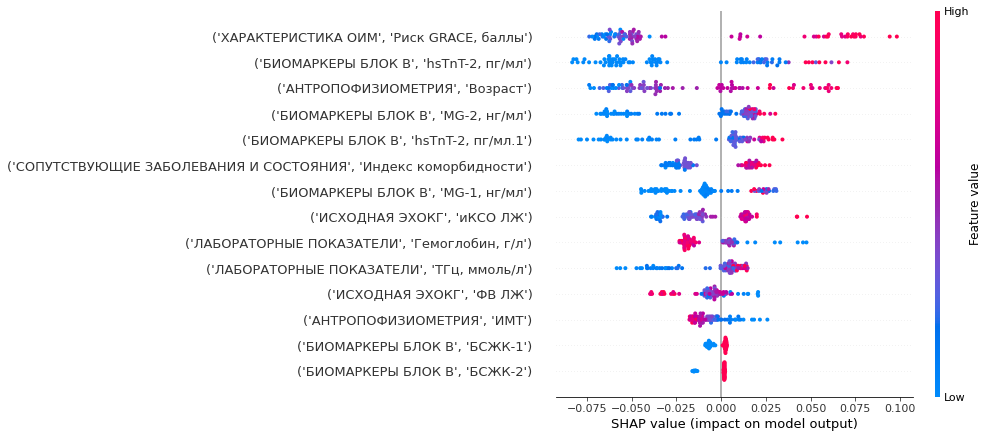

In [46]:
fig = shap.plots.beeswarm(shap_values[:,:,1], max_display=20,show=False)
plt.savefig(f'../Interpretation/SHAP/beeswarm_dataset_b.pdf', bbox_inches='tight')

### B

In [47]:
X_train, X_test, y_train, y_test = fs.get_train_test(link_train=link_train_combined_a, 
                                                     link_test=link_test_combined_a, 
                                                     dataset='a', 
                                                     subset='Biomarkers + Clinical', 
                                                     drop_col=list(set(map(str, clinical_features)) - set(preselected))
                                                    #  list(set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"]))
                                                     )

model = fs.get_model_instance(model='svm', target='Combined target', dataset='a', 
                                                     subset='Biomarkers + Clinical', X_train=X_train, y_train=y_train)
predicted = model.predict_proba(X_test)

In [48]:
explainer = shap.Explainer(model.predict, pd.concat([X_train, X_test]))
shap_values = explainer(pd.concat([X_train, X_test]))
values = shap_values.values[:,:]

Permutation explainer: 191it [03:33,  1.18s/it]                         


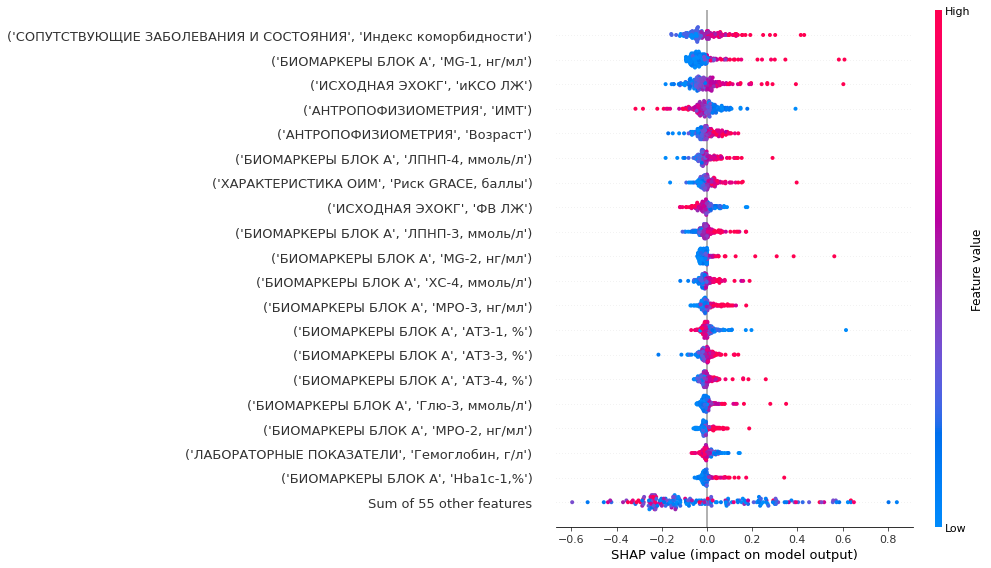

In [49]:
fig = shap.plots.beeswarm(shap_values, max_display=20,show=False)
plt.savefig(f'../Interpretation/SHAP/beeswarm_dataset_a.pdf', bbox_inches='tight')

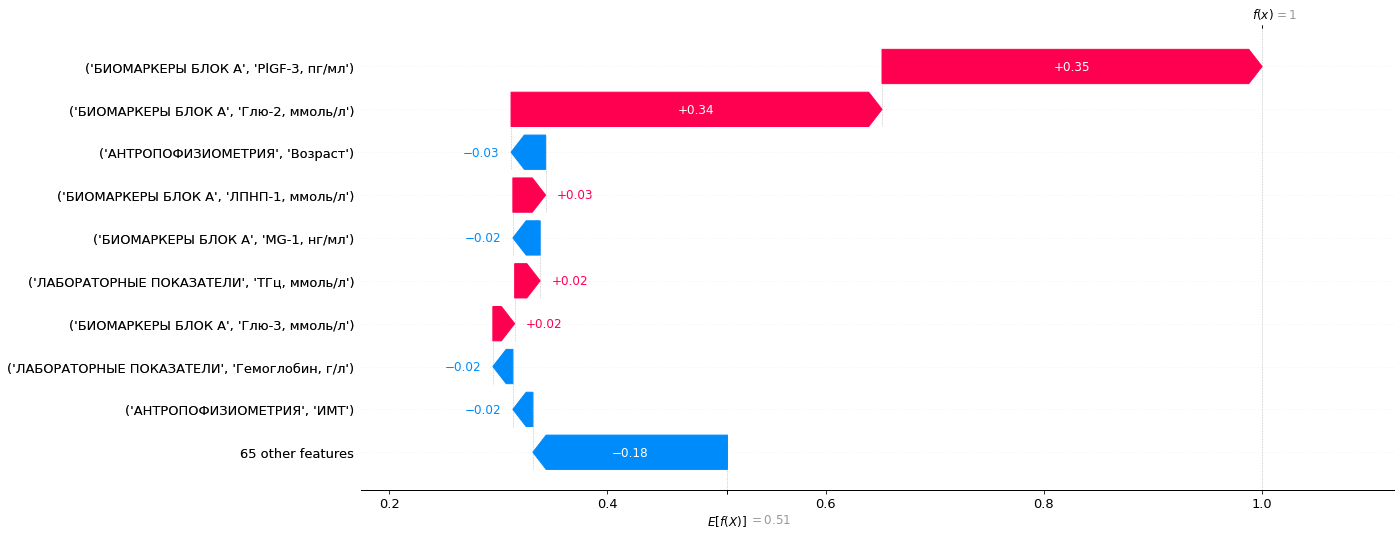

In [58]:
exp = shap.Explanation(shap_values.values, 
                shap_values.base_values, 
                # data=X_test.values, # shows values of that patient
                feature_names=X_test.columns)

fig = shap.plots.waterfall(exp[-9], show=False)
fig.set_size_inches(18.5, 8.5)
plt.show()

fig.savefig(f'../Interpretation/SHAP/waterfall_dataset_a.pdf', bbox_inches='tight')

### C

In [32]:
X_train, X_test, y_train, y_test = fs.get_train_test(link_train=link_train_combined_c, 
                                                     link_test=link_test_combined_c, 
                                                     dataset='c', 
                                                     subset='Biomarkers + Clinical', 
                                                     drop_col=list(set(map(str, clinical_features)) - set(preselected))
                                                    #  list(set(["('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')"]))
                                                     )

model = fs.get_model_instance(model='svm', target='Combined target', dataset='c', 
                                                     subset='Biomarkers + Clinical', X_train=X_train, y_train=y_train)
predicted = model.predict_proba(X_test)

In [33]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(pd.concat([X_train, X_test]))
values = shap_values.values[:,:]

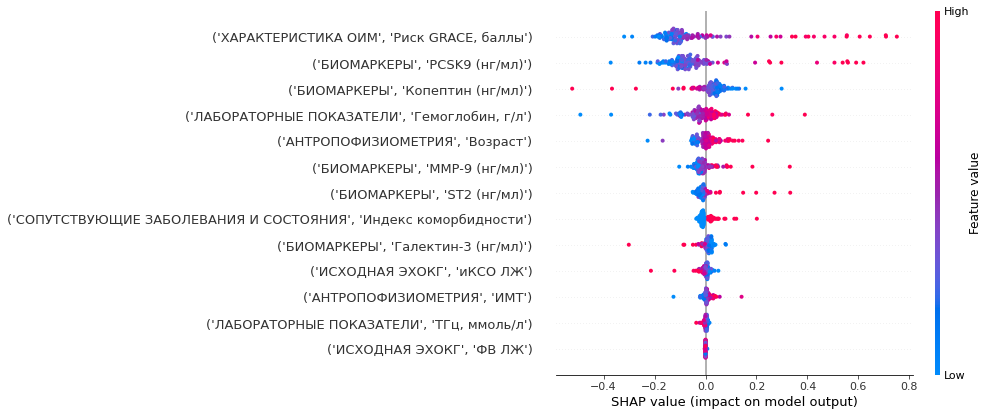

In [34]:
fig = shap.plots.beeswarm(shap_values, max_display=20,show=False)
plt.savefig(f'../Interpretation/SHAP/beeswarm_dataset_c.pdf', bbox_inches='tight')

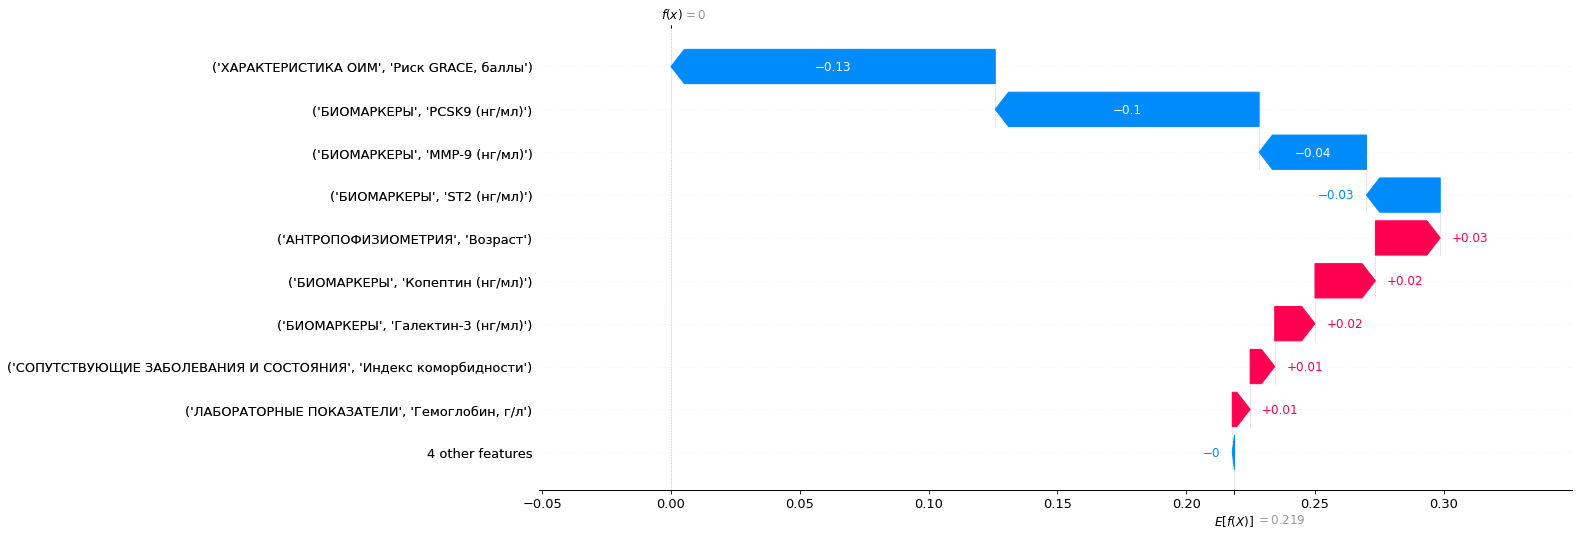

In [37]:
exp = shap.Explanation(shap_values.values, 
                shap_values.base_values, 
                # data=X_test.values, # shows values of that patient
                feature_names=X_test.columns)

fig = shap.plots.waterfall(exp[-1], show=False)
fig.set_size_inches(18.5, 8.5)
plt.show()

fig.savefig(f'../Interpretation/SHAP/waterfall_dataset_c.pdf', bbox_inches='tight')

# Results

In [6]:
'no_grace' 'grace' 'all'

'no_gracegraceall'

In [6]:
pd.options.display.float_format = '{:.3f}'.format
pd.set_option("display.precision", 3)
df = pd.read_excel('../Optimisation files/Combined target/Biomarkers + Clinical C/no_grace/metrics_table.xlsx', 
              header=[0,1], 
              index_col=0)\
                .sort_values(('ROC_AUC, train set, cv=5', 'mean'), ascending=False)

In [7]:
import numpy as np
df = np.round(df, decimals=2)

In [8]:

f = {
    ('Scores on the test set', 'ROC_AUC') :'{:.2f}',
    ('Scores on the test set', 'PR_AUC') :'{:.2f}',
    ('Scores on the test set', 'Recall') :'{:.2f}',
    ('Scores on the test set', 'Precision') :'{:.2f}',
    ('Scores on the test set', 'Accuracy') :'{:.2f}',
    ('Scores on the test set', 'F1') :'{:.2f}',
    ('Scores on the test set', 'MCC') :'{:.2f}',
    ('Scores on the test set', 'ROC_AUC') :'{:.2f}',
    ('MCC, train set, cv=5', 'mean') :'{:.2f}',
    ('MCC, train set, cv=5', 'std') :'{:.2f}',
    ('ROC_AUC, train set, cv=5', 'mean') :'{:.2f}',
    ('ROC_AUC, train set, cv=5', 'std') :'{:.2f}',
    }
df\
                .style.format(f).highlight_max(color = 'red', axis = 0, 
                                     subset=list(df.columns)[4:-4]+list(df.columns)[0:4:2]
                                    #  ['MCC, train set, cv=5', 'ROC_AUC, train set, cv=5']
                                     )

In [21]:
len(clinical_features)

35

In [44]:
preselected = list(
    # set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/all/SHAP/randomforest_shap_values.xlsx',
    #           index_col=0,
    #           header=0).sort_values('values', ascending=False)[:10]['features'].values).intersection(\
    set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/all/SHAP/LogisticRegression_shap_values.xlsx',
              index_col=0,
              header=0).sort_values('values', ascending=False)[:10]['features'].values).intersection(\
    set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/all/RFFI/values.xlsx',
              index_col=0,
              header=0).sort_values('values', ascending=False)[:10]['features'].values)))

preselected
for i in list(map(lambda x: eval(x)[1], preselected)):
    print(i)

ТГц, ммоль/л
ИМТ
иКСО ЛЖ
Гемоглобин, г/л
Риск GRACE, баллы


In [28]:
preselected = list(set(pd.read_excel('../Feature selection/Combined target/Clinical ABCD/all/RFFI/values.xlsx',
              index_col=0,
              header=0).sort_values('values', ascending=False)[:10]['features'].values))
preselected

["('ИСХОДНАЯ ЭХОКГ', 'ФВ ЛЖ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'ТГц, ммоль/л')",
 "('ИСХОДНАЯ ЭХОКГ', 'иКСО ЛЖ')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'ИМТ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Гемоглобин, г/л')",
 "('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'Возраст')",
 "('ИСХОДНАЯ ЭХОКГ', 'иКДО ЛЖ')",
 "('СОПУТСТВУЮЩИЕ ЗАБОЛЕВАНИЯ И СОСТОЯНИЯ', 'Индекс коморбидности')",
 "('ИСХОДНАЯ ЭХОКГ', 'иММ ЛЖ')"]

In [122]:
preselected = \
[
"('ИСХОДНАЯ ЭХОКГ', 'ФВ ЛЖ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'ТГц, ммоль/л')",
 "('ИСХОДНАЯ ЭХОКГ', 'иКСО ЛЖ')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'ИМТ')",
 "('ЛАБОРАТОРНЫЕ ПОКАЗАТЕЛИ', 'Гемоглобин, г/л')",
 "('ХАРАКТЕРИСТИКА ОИМ', 'Риск GRACE, баллы')",
 "('АНТРОПОФИЗИОМЕТРИЯ', 'Возраст')",
#  "('ИСХОДНАЯ ЭХОКГ', 'иКДО ЛЖ')",
 "('СОПУТСТВУЮЩИЕ ЗАБОЛЕВАНИЯ И СОСТОЯНИЯ', 'Индекс коморбидности')",
#  "('ИСХОДНАЯ ЭХОКГ', 'иММ ЛЖ')"
 ]

In [49]:
subset='Clinical'
dataset='abcd'

if dataset == 'a':
    link_train = link_train_combined_a
    link_test = link_test_combined_a
elif dataset == 'b':
    link_train = link_train_combined_b
    link_test = link_test_combined_b
elif dataset == 'abcd':
    link_train = link_train_combined_abcd
    link_test = link_test_combined_abcd
elif dataset == 'c':
    link_train = link_train_combined_c
    link_test = link_test_combined_c

fs = Feature_selector(
    targets = ['Combined target'],          # folder name to obtain optimisation files
    datasets = ['a', ],                     # a, b, c, abc
    subsets = ['Biomarkers + Clinical'],    # Biomarkers, Clinical, Biomarkers + Clinical
    models = ["randomforest",],              # svm, knn, LogisticRegression, catboost, randomforest, adaboost
    selectors = ['SFS'],                    # folder name to save results: RFFI, SFS/RFE, SHAP
    folder = 'top',            # folder name to save results
    drop_col=list(set(map(str, clinical_features)) - set(preselected)),
)

fs.save = False

X_train, X_test, y_train, y_test = fs.get_train_test(link_train=link_train, 
                  link_test=link_test, 
                  dataset=dataset, 
                  subset=subset, 
                  drop_col=list(set(map(str, clinical_features)) - set(preselected)))

model = fs.get_model_instance(model='randomforest', 
                              target='Combined target', 
                              subset=subset, 
                              dataset=dataset, 
                              X_train=X_train, 
                              y_train=y_train)

In [50]:
# add roc_auc fCV values'
cv_results = {}
cvs = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=20), scoring='roc_auc')
# cv_results['roc_auc'] = str(cvs)
cv_results['Mean train, cv=5'] = np.mean(cvs).round(3)
cv_results['Std train, cv=5'] = np.std(cvs).round(3)
model.fit(X_train, y_train)
predicted = model.predict_proba(X_test)
cv_results['Test'] = roc_auc(y_test, predicted[:,1]).round(3)

In [51]:
pd.DataFrame(cv_results, index=['Random Forest'])

,"Mean train, cv=5","Std train, cv=5",Test
Random Forest,0.777,0.067,0.845


# References